In [1]:
from dCSFA_NMF import dCSFA_NMF
import umc_data_tools as umc_dt
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import torch
import os


## Loading the Data

In [2]:
trial_and_spectral_df = pd.read_csv("/nancy/user/riwata/projects/reward_comp_ext/results/2024_06_10_dcsfa_nmf/data/rce_pilot_2_trial_averages.csv")

In [3]:
trial_and_spectral_df.head()

,Unnamed: 0,index,tracked_subject,box_number,sleap_name,video_name,current_subject,tone_start_frame,reward_start_frame,tone_stop_frame,...,trial_mPFC_power_theta,trial_mPFC_power_gamma,trial_MD_power_theta,trial_MD_power_gamma,trial_LH_power_theta,trial_LH_power_gamma,trial_BLA_power_theta,trial_BLA_power_gamma,trial_vHPC_power_theta,trial_vHPC_power_gamma
0,0,0,"['1.1', '1.2']",1,20230612_112630_standard_comp_to_training_D1_s...,20230612_112630_standard_comp_to_training_D1_s...,1.1,1125,1225,1324,...,0.030160,0.002167,0.038922,0.001269,0.040500,0.001394,0.034031,0.002251,0.021546,0.002843
1,1,1,"['1.1', '1.2']",1,20230612_112630_standard_comp_to_training_D1_s...,20230612_112630_standard_comp_to_training_D1_s...,1.1,3519,3619,3720,...,0.028266,0.002177,0.045080,0.001082,0.049413,0.001238,0.039506,0.002506,0.035230,0.002768
2,2,2,"['1.1', '1.2']",1,20230612_112630_standard_comp_to_training_D1_s...,20230612_112630_standard_comp_to_training_D1_s...,1.1,5815,5915,6014,...,0.032059,0.002143,0.047931,0.001078,0.051984,0.001189,0.039781,0.002418,0.036432,0.002515
3,3,3,"['1.1', '1.2']",1,20230612_112630_standard_comp_to_training_D1_s...,20230612_112630_standard_comp_to_training_D1_s...,1.1,7612,7712,7811,...,0.035129,0.001958,0.048240,0.001254,0.048795,0.001418,0.044025,0.003139,0.030132,0.002564
4,4,4,"['1.1', '1.2']",1,20230612_112630_standard_comp_to_training_D1_s...,20230612_112630_standard_comp_to_training_D1_s...,1.1,8709,8809,8910,...,0.024816,0.002066,0.033157,0.001108,0.032718,0.001254,0.026005,0.002629,0.025761,0.003003


In [4]:
trial_and_spectral_df = trial_and_spectral_df[trial_and_spectral_df["trial_label"].isin(["win", "lose"])]

In [5]:
trial_and_spectral_df = trial_and_spectral_df.dropna()

In [6]:
trial_and_spectral_df.shape

(92, 210)

In [7]:
spectral_columns = [col for col in trial_and_spectral_df if ("gamma" in col or "theta" in col) and "trial" in col]

In [8]:
spectral_columns

['trial_BLA_LH_coherence_theta',
 'trial_BLA_LH_coherence_gamma',
 'trial_BLA_MD_coherence_theta',
 'trial_BLA_MD_coherence_gamma',
 'trial_BLA_mPFC_coherence_theta',
 'trial_BLA_mPFC_coherence_gamma',
 'trial_BLA_vHPC_coherence_theta',
 'trial_BLA_vHPC_coherence_gamma',
 'trial_LH_MD_coherence_theta',
 'trial_LH_MD_coherence_gamma',
 'trial_LH_mPFC_coherence_theta',
 'trial_LH_mPFC_coherence_gamma',
 'trial_LH_vHPC_coherence_theta',
 'trial_LH_vHPC_coherence_gamma',
 'trial_MD_mPFC_coherence_theta',
 'trial_MD_mPFC_coherence_gamma',
 'trial_MD_vHPC_coherence_theta',
 'trial_MD_vHPC_coherence_gamma',
 'trial_mPFC_vHPC_coherence_theta',
 'trial_mPFC_vHPC_coherence_gamma',
 'trial_BLA_LH_granger_theta',
 'trial_BLA_LH_granger_gamma',
 'trial_LH_BLA_granger_theta',
 'trial_LH_BLA_granger_gamma',
 'trial_BLA_MD_granger_theta',
 'trial_BLA_MD_granger_gamma',
 'trial_MD_BLA_granger_theta',
 'trial_MD_BLA_granger_gamma',
 'trial_BLA_mPFC_granger_theta',
 'trial_BLA_mPFC_granger_gamma',
 'tria

In [9]:
trial_and_spectral_df

,Unnamed: 0,index,tracked_subject,box_number,sleap_name,video_name,current_subject,tone_start_frame,reward_start_frame,tone_stop_frame,...,trial_mPFC_power_theta,trial_mPFC_power_gamma,trial_MD_power_theta,trial_MD_power_gamma,trial_LH_power_theta,trial_LH_power_gamma,trial_BLA_power_theta,trial_BLA_power_gamma,trial_vHPC_power_theta,trial_vHPC_power_gamma
15,15,15,"['1.1', '1.2']",1,20230612_112630_standard_comp_to_training_D1_s...,20230612_112630_standard_comp_to_training_D1_s...,1.1,24680,24780,24879,...,0.029244,0.001777,0.030272,0.001040,0.025122,0.001234,0.020806,0.002401,0.018319,0.002467
35,35,51,"['1.1', '1.2']",1,20230612_112630_standard_comp_to_training_D1_s...,20230612_112630_standard_comp_to_training_D1_s...,1.2,24680,24780,24879,...,0.027083,0.001320,0.046132,0.001538,0.038214,0.001633,0.028443,0.002576,0.020853,0.001987
170,170,261,"['1.1', '1.2']",1,20230614_114041_standard_comp_to_training_D3_s...,20230614_114041_standard_comp_to_training_D3_s...,1.1,17524,17624,17723,...,0.025681,0.001651,0.030790,0.001144,0.027376,0.001221,0.020837,0.002366,0.020987,0.002408
174,174,269,"['1.1', '1.2']",1,20230614_114041_standard_comp_to_training_D3_s...,20230614_114041_standard_comp_to_training_D3_s...,1.1,22514,22614,22714,...,0.024713,0.002106,0.031318,0.001219,0.029308,0.001459,0.023243,0.003285,0.016911,0.002928
197,197,304,"['1.1', '1.2']",1,20230614_114041_standard_comp_to_training_D3_s...,20230614_114041_standard_comp_to_training_D3_s...,1.2,17524,17624,17723,...,0.022289,0.001252,0.026126,0.001067,0.022095,0.001270,0.021442,0.001861,0.019930,0.001658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,962,1364,"['1.2', '2.2']",2,20230630_115506_standard_comp_to_novel_agent_D...,20230630_115506_standard_comp_to_novel_agent_D...,1.2,60714,60814,60914,...,0.023956,0.000833,0.017446,0.000899,0.018835,0.001020,0.019226,0.001786,0.021964,0.001045
963,963,1365,"['1.2', '2.2']",2,20230630_115506_standard_comp_to_novel_agent_D...,20230630_115506_standard_comp_to_novel_agent_D...,1.2,62211,62311,62410,...,0.031187,0.000980,0.029963,0.000808,0.027726,0.000967,0.022851,0.002094,0.030460,0.001304
964,964,1366,"['1.2', '2.2']",2,20230630_115506_standard_comp_to_novel_agent_D...,20230630_115506_standard_comp_to_novel_agent_D...,1.2,64207,64307,64406,...,0.023314,0.000836,0.036276,0.001013,0.033335,0.001172,0.025945,0.001956,0.032830,0.001386
965,965,1367,"['1.2', '2.2']",2,20230630_115506_standard_comp_to_novel_agent_D...,20230630_115506_standard_comp_to_novel_agent_D...,1.2,66104,66204,66303,...,0.029101,0.000952,0.028479,0.000766,0.025456,0.000916,0.023135,0.002034,0.027572,0.001236


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(

    trial_and_spectral_df[spectral_columns + ["current_subject"]], trial_and_spectral_df["trial_label"], test_size=0.2, random_state=42, stratify=trial_and_spectral_df["current_subject"])

In [12]:
DS_FEATURES = False

#Note, we are using the demo test set for the validation data in this demo. Make sure you save your test sets for final analysis in real projects.
TRAINING_DATA_FILE = "TeST_train_dict.pkl"
VALIDATION_DATA_FILE = "TeST_test_dict.pkl"

#Features used in our data construction. In this example we are using power, coherence, and granger caussality.

if not DS_FEATURES:
    X_FEATURE_LIST = ["X_coh","X_gc", "X_psd"]
else:
    X_FEATURE_LIST = ["X_psd_ds","X_ds"]

#These weights allow for multiplying a given feature by a constant. For example, if power is significantly lower magnitude than other features, we can set the weight to upscale those features. 
#There are countermeasures in the model that handle this already though, so a default of 1 for every feature is usually sufficient
X_FEATURE_WEIGHTS = [1,1,1] 

#Feature for which we would like to predict. In this demo, we will need to convert these values to a binary vector. Your case may already be in a binary vector however.
Y_FEATURE = "y_task" 

#Feature for which you would like to make an intercept for each unique value. Typically this is done per mouse.
Y_INTERCEPT_FEATURE = "y_mouse" 

#Y_SAMPLING_FEATURE can be used to ensure equal use in the model for different groups. If "y_mosue" is used, then each mouse will have equal influence on the model, regardless of recording length.
Y_SAMPLING_FEATURE = "y_mouse" 


In [13]:
#Loading the training data
with open(os.path.join("./data", TRAINING_DATA_FILE),"rb") as f:
    train_dict = pickle.load(f)

print("Dictionary Keys: ",train_dict.keys())
#Loading the validation data
with open(os.path.join("./data", VALIDATION_DATA_FILE),"rb") as f:
    val_dict = pickle.load(f)


Dictionary Keys:  dict_keys(['X_psd', 'X_coh', 'X_gc', 'X_psd_ds', 'X_ds', 'y_mouse', 'y_task', 'y_geno', 'Freqs', 'powFeatures', 'cohFeatures', 'gcFeatures', 'dsFeatures', 'areas'])


In [14]:
train_dict

{'X_psd': array([[0.0760254 , 0.10016163, 0.12803048, ..., 0.0049056 , 0.00457529,
         0.00442892],
        [0.8464629 , 0.7730159 , 0.65566623, ..., 0.00142216, 0.00153247,
         0.00176085],
        [0.5517556 , 0.50427806, 0.4364143 , ..., 0.00424597, 0.00382716,
         0.00331714],
        ...,
        [0.23500696, 0.26405618, 0.28750968, ..., 0.00288899, 0.00260459,
         0.00223965],
        [0.66960984, 0.6101431 , 0.51093423, ..., 0.00828898, 0.00873576,
         0.00924515],
        [0.24606659, 0.27994677, 0.31593856, ..., 0.00249793, 0.00218222,
         0.00202295]], dtype=float32),
 'X_coh': array([[0.94296694, 0.94868892, 0.96023875, ..., 0.13725406, 0.21260357,
         0.28766534],
        [0.9231202 , 0.93600398, 0.95072269, ..., 0.01505274, 0.06181914,
         0.17954242],
        [0.93598342, 0.94622368, 0.95901036, ..., 0.42749757, 0.29241675,
         0.10120565],
        ...,
        [0.98480821, 0.98402929, 0.98165315, ..., 0.06860535, 0.25842172,
 

In [15]:
# #Create X matrices
# X_train = np.hstack([train_dict[feature]*weight for feature,weight in zip(X_FEATURE_LIST,X_FEATURE_WEIGHTS)])
# X_test = np.hstack([val_dict[feature]*weight for feature,weight in zip(X_FEATURE_LIST,X_FEATURE_WEIGHTS)])

In [16]:
X_train = X_train_df.drop(columns=["current_subject"], errors="ignore").to_numpy()
X_test = X_test_df.drop(columns=["current_subject"], errors="ignore").to_numpy()

In [17]:
#Create y vectors for prediction. In this case we wish to predict for the Tail-Suspension (TS) condition and convert our label vector to {1: TS, 0: other}.
y_train = (y_train_df.to_numpy()=="win").reshape(-1,1)
y_val = (y_test_df.to_numpy()=="win").reshape(-1,1)

In [18]:
#Create intercept and sampling vectors (note, these vectors are only relevant to training)
y_intercept_train = X_train_df["current_subject"]
y_sampling_train = OrdinalEncoder().fit_transform(X_train_df["current_subject"].to_numpy().reshape(-1,1))
y_intercept_mask = OneHotEncoder().fit_transform(y_intercept_train.to_numpy().reshape(-1,1)).todense()

In [19]:
train_dict.keys()

dict_keys(['X_psd', 'X_coh', 'X_gc', 'X_psd_ds', 'X_ds', 'y_mouse', 'y_task', 'y_geno', 'Freqs', 'powFeatures', 'cohFeatures', 'gcFeatures', 'dsFeatures', 'areas'])

In [20]:
train_dict["dsFeatures"]

array(['Acb_Core->Acb_Sh 1', 'Acb_Core->Acb_Sh 2', 'Acb_Core->Acb_Sh 3',
       ..., 'mSNC->mDHip 54', 'mSNC->mDHip 55', 'mSNC->mDHip 56'],
      dtype='<U21')

In [21]:
train_dict["X_psd"].shape

(786, 616)

In [22]:
train_dict["X_coh"].shape

(786, 3080)

In [23]:
train_dict["X_gc"].shape

(786, 6160)

In [24]:
train_dict["Freqs"]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56], dtype=int32)

In [25]:
train_dict["powFeatures"]

array(['Acb_Core 1', 'Acb_Core 2', 'Acb_Core 3', 'Acb_Core 4',
       'Acb_Core 5', 'Acb_Core 6', 'Acb_Core 7', 'Acb_Core 8',
       'Acb_Core 9', 'Acb_Core 10', 'Acb_Core 11', 'Acb_Core 12',
       'Acb_Core 13', 'Acb_Core 14', 'Acb_Core 15', 'Acb_Core 16',
       'Acb_Core 17', 'Acb_Core 18', 'Acb_Core 19', 'Acb_Core 20',
       'Acb_Core 21', 'Acb_Core 22', 'Acb_Core 23', 'Acb_Core 24',
       'Acb_Core 25', 'Acb_Core 26', 'Acb_Core 27', 'Acb_Core 28',
       'Acb_Core 29', 'Acb_Core 30', 'Acb_Core 31', 'Acb_Core 32',
       'Acb_Core 33', 'Acb_Core 34', 'Acb_Core 35', 'Acb_Core 36',
       'Acb_Core 37', 'Acb_Core 38', 'Acb_Core 39', 'Acb_Core 40',
       'Acb_Core 41', 'Acb_Core 42', 'Acb_Core 43', 'Acb_Core 44',
       'Acb_Core 45', 'Acb_Core 46', 'Acb_Core 47', 'Acb_Core 48',
       'Acb_Core 49', 'Acb_Core 50', 'Acb_Core 51', 'Acb_Core 52',
       'Acb_Core 53', 'Acb_Core 54', 'Acb_Core 55', 'Acb_Core 56',
       'Acb_Sh 1', 'Acb_Sh 2', 'Acb_Sh 3', 'Acb_Sh 4', 'Acb_Sh 5',
    

In [26]:
train_dict["y_mouse"].shape

(786,)

In [27]:
train_dict["y_mouse"]

array(['MouseCKV10', 'MouseCKV10', 'MouseCKV10', 'MouseCKV10',
       'MouseCKV10', 'MouseCKV10', 'MouseCKV10', 'MouseCKV10',
       'MouseCKV10', 'MouseCKV10', 'MouseCKV10', 'MouseCKV10',
       'MouseCKV10', 'MouseCKV10', 'MouseCKV10', 'MouseCKV10',
       'MouseCKV10', 'MouseCKV10', 'MouseCKV10', 'MouseCKV10',
       'MouseCKV10', 'MouseCKV10', 'MouseCKV10', 'MouseCKV10',
       'MouseCKV10', 'MouseCKV10', 'MouseCKV10', 'MouseCKV10',
       'MouseCKV10', 'MouseCKV10', 'MouseCKV10', 'MouseCKV10',
       'MouseCKV10', 'MouseCKV10', 'MouseCKV10', 'MouseCKV10',
       'MouseCKV10', 'MouseCKV10', 'MouseCKV10', 'MouseCKV10',
       'MouseCKB9', 'MouseCKB9', 'MouseCKB9', 'MouseCKB9', 'MouseCKB9',
       'MouseCKB9', 'MouseCKB9', 'MouseCKB9', 'MouseCKB9', 'MouseCKB9',
       'MouseCKB9', 'MouseCKB9', 'MouseCKB9', 'MouseCKB9', 'MouseCKB9',
       'MouseCKB9', 'MouseCKB9', 'MouseCKB9', 'MouseCKB9', 'MouseCKB9',
       'MouseCKB9', 'MouseCKB9', 'MouseCKB9', 'MouseCKB9', 'MouseCKB9',
       'Mo

In [28]:
train_dict["powFeatures"].shape

(616,)

## Visualizing Our Data

In [29]:
DS_FEATURES

False

In [30]:
powFeatures = [col for col in X_train_df.columns if "power" in col]
cohFeatures = [col for col in X_train_df.columns if "coherence" in col]
gcFeatures = [col for col in X_train_df.columns if "granger" in col]

In [31]:
train_dict['X_coh'].shape

(786, 3080)

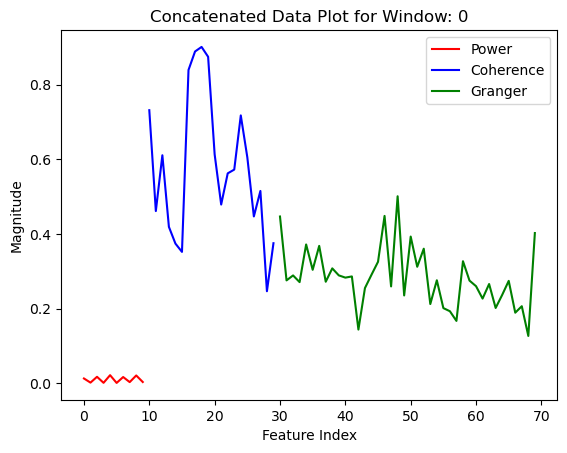

In [32]:
num_power_features = len(powFeatures)
num_coh_features = len(cohFeatures)
num_gc_features = len(gcFeatures)
window = 0

plt.plot(range(num_power_features),X_train_df[powFeatures].to_numpy()[window,:],c='red',label='Power')
plt.plot(range(num_power_features,num_coh_features+num_power_features),X_train_df[cohFeatures].to_numpy()[window,:],c='blue',label='Coherence')
plt.plot(range(num_coh_features+num_power_features,num_coh_features+num_power_features+num_gc_features),
        X_train_df[gcFeatures].to_numpy()[window,:],c='green',label='Granger')

# plt.plot(range(num_power_features),X_train_df[powFeatures].to_numpy()[window,:],c='red',label='Power')
# plt.plot(range(num_power_features,num_coh_features+num_power_features),X_train_df[cohFeatures].to_numpy()[window,:],c='blue',label='Coherence')
# plt.plot(range(num_coh_features+num_power_features,num_coh_features+num_power_features+num_gc_features),
#         X_train_df[gcFeatures].to_numpy()[window,:],c='green',label='Granger')

plt.xlabel('Feature Index')
plt.ylabel('Magnitude')
plt.title("Concatenated Data Plot for Window: {}".format(window))
plt.legend()
plt.show()


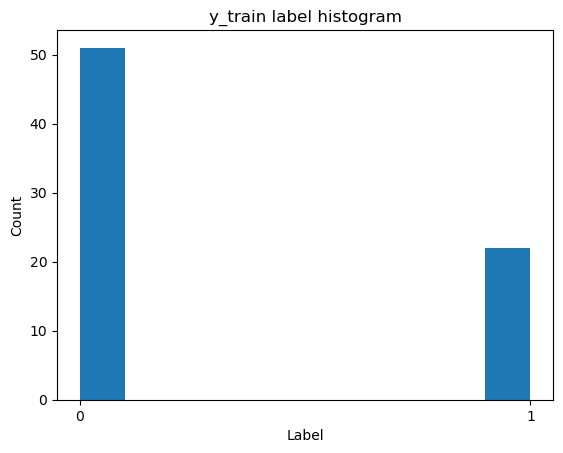

In [33]:
#It is also often helpful to know the percentage of your data that is in the positive and negative class
plt.hist(y_train.astype(int))
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('y_train label histogram')
plt.xticks(range(2),labels=['0','1'])
plt.show()

## Define the Model

In [34]:
#Save file for the model and state_dictionary for in-progress training
MODEL_SAVE_FILE = "demo_model.pt"
MODEL_STATE_DICT = "demo_sd.pt"

#Number of networks you would like to learn
N_COMPONENTS = 20

#The shape of the data used for the encoder and decoder
DIM_IN = X_train.shape[1]

#Constrains the supervised network to a certain correlation. In the case of multiple supervised networks
#Input a list of network constraints such as ['Positive','Negative']. None is also acceptable if there is
#no preference for learned correlation.
NETWORK_CONSTRAINT = "Positive"

#Device that should be used (cpu or cuda:#). "auto" detects whether a gpu is present and selects it if
#available. Auto is not recommended for multiple GPU systems. 
DEVICE = "auto"

#The number of intercepts the model should learn for the logistic regression classifier
N_INTERCEPTS = y_intercept_mask.shape[1]

#Optimization algorithm used. AdamW tends to get better predictive performance whereas SGD helps with
#providing a smooth interpretation.
OPTIMIZER = "SGD"

#only relevant if the optimizer is SGD. Helps encourage a smoother supervised network
MOMENTUM = 0.9

#The number of supervised networks you would like to train. In the case of more than 1, you must input
#y_train as a list of y vectors for each task you would like to supervise
N_SUP_NETWORKS = 1

#What type of reconstruction loss that will be used. MSE is what was used on previous cpne publications
#however, it can be sensitive to outliers. "IS" or itakura-saito divergence loss is scale invariant and
#can result in better results, but can be sensitive if the reconstruction values are close to 0.
RECON_LOSS = "MSE"

#Weighs the importance of reconstruction. Raise if reconstruction is poor.
SUP_RECON_WEIGHT = 1

#Weighs the importance of supervision. Lower if reconstruction is poor.
SUP_WEIGHT = 1

#Identifies whether we would like to use a neural network encoder or a linear encoder.
DEEP_ENC = True

#The breadth of the neural network encoder
H = 256

#This determines what type of supervised reconstruction loss is used. Residual is the default and is less
#strict than "All", however it can be prone to more sparse supervised networks. "All" can be too strict
#and result in supervised networks that try to represent all of the features rather than just those 
#relevant to the task of interest
SUP_RECON = "Residual"

#used with the residual supervised recon loss. Higher values discourage sparse supervised networks, but may result
#in poorer predictive performance.
SUP_SMOOTHNESS_WEIGHT = 1




In [35]:
X_FEATURE_LIST = [cohFeatures, gcFeatures, powFeatures] 

In [36]:
X_train_df

,trial_BLA_LH_coherence_theta,trial_BLA_LH_coherence_gamma,trial_BLA_MD_coherence_theta,trial_BLA_MD_coherence_gamma,trial_BLA_mPFC_coherence_theta,trial_BLA_mPFC_coherence_gamma,trial_BLA_vHPC_coherence_theta,trial_BLA_vHPC_coherence_gamma,trial_LH_MD_coherence_theta,trial_LH_MD_coherence_gamma,...,trial_mPFC_power_gamma,trial_MD_power_theta,trial_MD_power_gamma,trial_LH_power_theta,trial_LH_power_gamma,trial_BLA_power_theta,trial_BLA_power_gamma,trial_vHPC_power_theta,trial_vHPC_power_gamma,current_subject
388,0.731247,0.461373,0.610693,0.419074,0.374332,0.352140,0.838931,0.888353,0.900559,0.874165,...,0.002354,0.017923,0.001817,0.022278,0.001539,0.017310,0.003712,0.021491,0.003970,1.4
876,0.659147,0.412599,0.688976,0.409434,0.478121,0.308212,0.650751,0.734217,0.938721,0.825864,...,0.001992,0.035335,0.000903,0.032544,0.001061,0.025344,0.003259,0.027393,0.002654,1.4
355,0.802035,0.543652,0.806466,0.509645,0.615185,0.398339,0.479314,0.364526,0.914467,0.796600,...,0.001240,0.040554,0.001319,0.036831,0.001469,0.030267,0.002462,0.026820,0.001884,1.2
966,0.791196,0.510077,0.795149,0.486389,0.658340,0.373551,0.437828,0.349706,0.913054,0.793650,...,0.001021,0.030066,0.001002,0.025811,0.001135,0.028521,0.003552,0.022803,0.001620,1.2
465,0.718974,0.550478,0.689183,0.522584,0.633452,0.437484,0.381972,0.333925,0.932913,0.808724,...,0.001080,0.033540,0.001385,0.026212,0.001480,0.027064,0.002578,0.017466,0.001896,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,0.558485,0.598080,0.512507,0.513849,0.529990,0.446036,0.372128,0.338991,0.832813,0.796335,...,0.000829,0.016153,0.001025,0.014869,0.001100,0.013878,0.001690,0.037344,0.001066,1.2
174,0.823116,0.481690,0.798934,0.493251,0.622719,0.385138,0.536521,0.425105,0.944842,0.856017,...,0.002106,0.031318,0.001219,0.029308,0.001459,0.023243,0.003285,0.016911,0.002928,1.1
346,0.786779,0.599368,0.767351,0.515702,0.609166,0.469149,0.463229,0.337344,0.923629,0.799585,...,0.001245,0.046490,0.001261,0.041590,0.001505,0.030274,0.002164,0.020571,0.001510,1.2
467,0.714268,0.632254,0.652551,0.584394,0.599920,0.466755,0.348741,0.334819,0.893699,0.810807,...,0.001134,0.030038,0.001473,0.025783,0.001684,0.025765,0.002744,0.021141,0.002183,1.2


In [37]:
#Feature groups provides the indices for each of the features used in the model. The model uses these
#indices to weigh the importance of reconstructing each feature. This means that the power features will
#still be important to the reconstruction, even though they only make up a small fraction of the features
running_idx = 0
feature_groups = []
for idx,feature in enumerate(X_FEATURE_LIST):
    f_begin = running_idx
    f_end = f_begin + len(feature) 
    if idx == 0:
        f_end = f_end -1
    feature_groups.append((f_begin,f_end))

    running_idx = f_end

FEATURE_GROUPS = feature_groups

#The weighting per group is calculated automatically if using None which will scale based on number of features. However,
#custom weighting may be chosen by hand. This vector should be the same length as X_FEATURE_LIST with a weight for each of
#the features
GROUP_WEIGHTS = None

In [38]:
FEATURE_GROUPS

[(0, 19), (19, 59), (59, 69)]

In [39]:
#Define the model

#----------------------------------------------------------
# W A R N I N G
#
# The hyperparameters here and above are meant only to demonstrate usage for the model and are in no way the recommended defaults
# for training your model.
#----------------------------------------------------------

model = dCSFA_NMF(n_components=N_COMPONENTS, #Number of learned networks
                dim_in=DIM_IN, #Number of features in X
                n_sup_networks=N_SUP_NETWORKS, #Number of networks to be supervised
                optim_name=OPTIMIZER, #What type of optimizer you would like to use {SGD,Adam,AdamW}
                recon_loss=RECON_LOSS, #What type of reconstruction loss to use {MSE,IS}
                sup_recon_weight=SUP_RECON_WEIGHT, #Importance of the supervised network reconstruction
                sup_weight=SUP_WEIGHT, #Importance of the supervision weight
                n_intercepts=N_INTERCEPTS, #Number of random intercepts (often grouped by mouse, experiment, etc.)
                useDeepEnc=DEEP_ENC, #Whether or not you would like to use the deep neural network encoder
                h=H, #The breadth of the neural network encoder
                sup_recon_type=SUP_RECON, #What type of supervised reconstruction loss you would like to use {Residual,All}
                feature_groups=FEATURE_GROUPS, #Breakpoints for each type of feature i.e. power, coh, granger. Used for equivalent feature weighting
                group_weights=GROUP_WEIGHTS, #Weights for each of the groups
                fixed_corr=NETWORK_CONSTRAINT, #Correlation constraints for the supervised networks
                momentum=MOMENTUM, #Momentum value for SGD with momentum - default is 0.9
                sup_smoothness_weight=SUP_SMOOTHNESS_WEIGHT #Parameter to encourage more smooth supervised networks if using the residual reconstruction
                )

## Fit the Model

In [40]:
#Fit or Load the model
LOAD = False

if LOAD:
    #Load the model onto the cpu
    model = torch.load(MODEL_SAVE_FILE,map_location='cpu')
    model.device='cpu'
else:
    #----------------------------------------------------------
    # W A R N I N G
    #
    # The hyperparameters here and above are meant only to demonstrate usage for the model and are in no way the recommended defaults
    # for training your model.
    #
    #
    # Also, please note that the recon loss reported during training is not the same as the MSE. This is reporting the weighted reconstruction
    # of the features. Also, AUCs are by-window so you should not expect them to match the by mouse auc that we collect later.
    #----------------------------------------------------------
    model.fit(X_train,
            y_train,
            y_sample_groups=y_sampling_train, 
            y_pred_weights=None,##Weights for the importance of each window for prediction. 
                                #If `None` then all windows are weighted equally, see multiple network demo for usage
            intercept_mask=y_intercept_mask,
            task_mask=None, #Allows for masking which windows you would like to use with supervision
                            #See multiple network demo for usage
            n_epochs=1000, #Training time
            n_pre_epochs=100, #Pre-training time
            nmf_max_iter=500, #Maximum iterations for fitting unsupervised NMF for pretraining
            batch_size=128, #Batch size for gradient descent
            lr=1e-3, #Learning rate for gradient descent
            pretrain=True, #Indicates whether you would like to pretrain the model
            verbose=True, #Indicates you would like progress printouts during training
            X_val=X_test, #Validation data for early stopping (save the model with the best validation performance)
            y_val=y_val, #Validation labels for early stopping
            y_pred_weights_val=None, #same as above.
            task_mask_val=None, #Allows for masking which windows you would like to use with supervision
                                #See multiple network demo for usage
            best_model_name = MODEL_STATE_DICT #saved state of the model during training so best model can be reloaded
            )

    #Save the model
    torch.save(model,MODEL_SAVE_FILE)

/home/pc_lab/miniforge3/envs/dcsfa_nmf_env/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Pretraining....
Pretraining NMF...
Identifying predictive components for network 0


100%|██████████| 20/20 [00:00<00:00, 1237.62it/s]

Selecting network: 5 with auc 0.7107843137254902 for sup net 0 using constraint positive correlation



Pretrain Epoch: 99, Recon Loss: 0.51: 100%|██████████| 100/100 [00:00<00:00, 178.05it/s]


Pretraining Complete
Beginning Training


Epoch: 999, Best Epoch: 964 Best Val Recon: 0.07704166322946548, Best Val by Window ROC-AUC: [0.5] loss: 1.6549348831176758, recon: 0.013179615139961243, pred by Window roc-auc: [0.803030303030303]: 100%|██████████| 1000/1000 [00:10<00:00, 96.74it/s]            


Loading best model...
Done!


## Evaluate Model Training and Performance

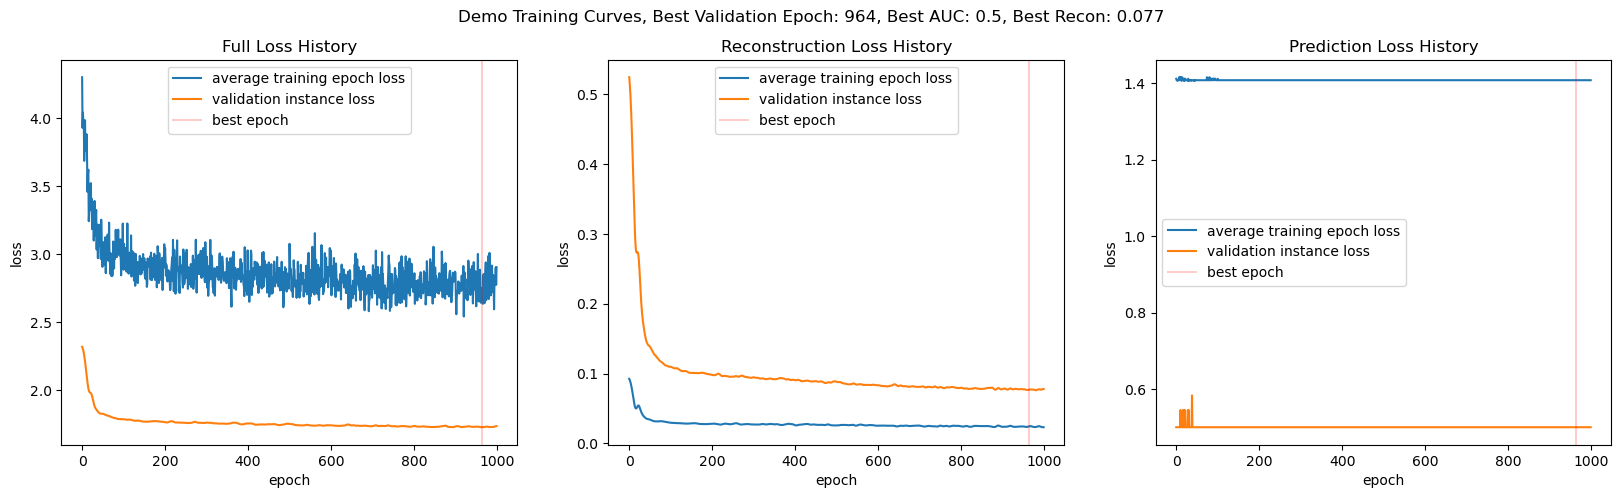

In [42]:
#The training losses are the sum losses over each training epoch. To make them comparable we get the average iteration loss for each epoch by dividing the
#training loss by a batch average factor which is approximately the number of training steps in an epoch.
BATCH_AVERAGE_FACTOR = X_train.shape[0]/128
BEST_EPOCH = model.best_epoch
BEST_AUC = model.best_val_auc[0]
BEST_VAL_RECON = model.best_val_recon.cpu().detach().numpy()
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.plot(np.array(model.training_hist) / BATCH_AVERAGE_FACTOR,label='average training epoch loss')
plt.plot(model.val_loss_hist,label='validation instance loss')
plt.axvline(BEST_EPOCH,color='red',alpha=0.2,label='best epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Full Loss History')
plt.legend()


plt.subplot(1,3,2)
#val_recon_hist = [value.cpu().detach().numpy() for value in model.val_recon_loss_hist]
plt.plot(np.array(model.recon_hist) / BATCH_AVERAGE_FACTOR,label='average training epoch loss')
plt.plot(model.val_recon_loss_hist,label='validation instance loss')
plt.axvline(BEST_EPOCH,color='red',alpha=0.2,label='best epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Reconstruction Loss History')
plt.legend()


plt.subplot(1,3,3)
plt.plot(np.array(model.pred_hist) / BATCH_AVERAGE_FACTOR,label='average training epoch loss')
plt.plot(model.val_pred_loss_hist,label='validation instance loss')
plt.axvline(BEST_EPOCH,color='red',alpha=0.2,label='best epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Prediction Loss History')
plt.legend()

plt.suptitle("Demo Training Curves, Best Validation Epoch: {}, Best AUC: {:.3}, Best Recon: {:.3}".format(BEST_EPOCH,BEST_AUC,BEST_VAL_RECON))
plt.show()

## Evaluating Reconstruction Contribution of the Supervised Network

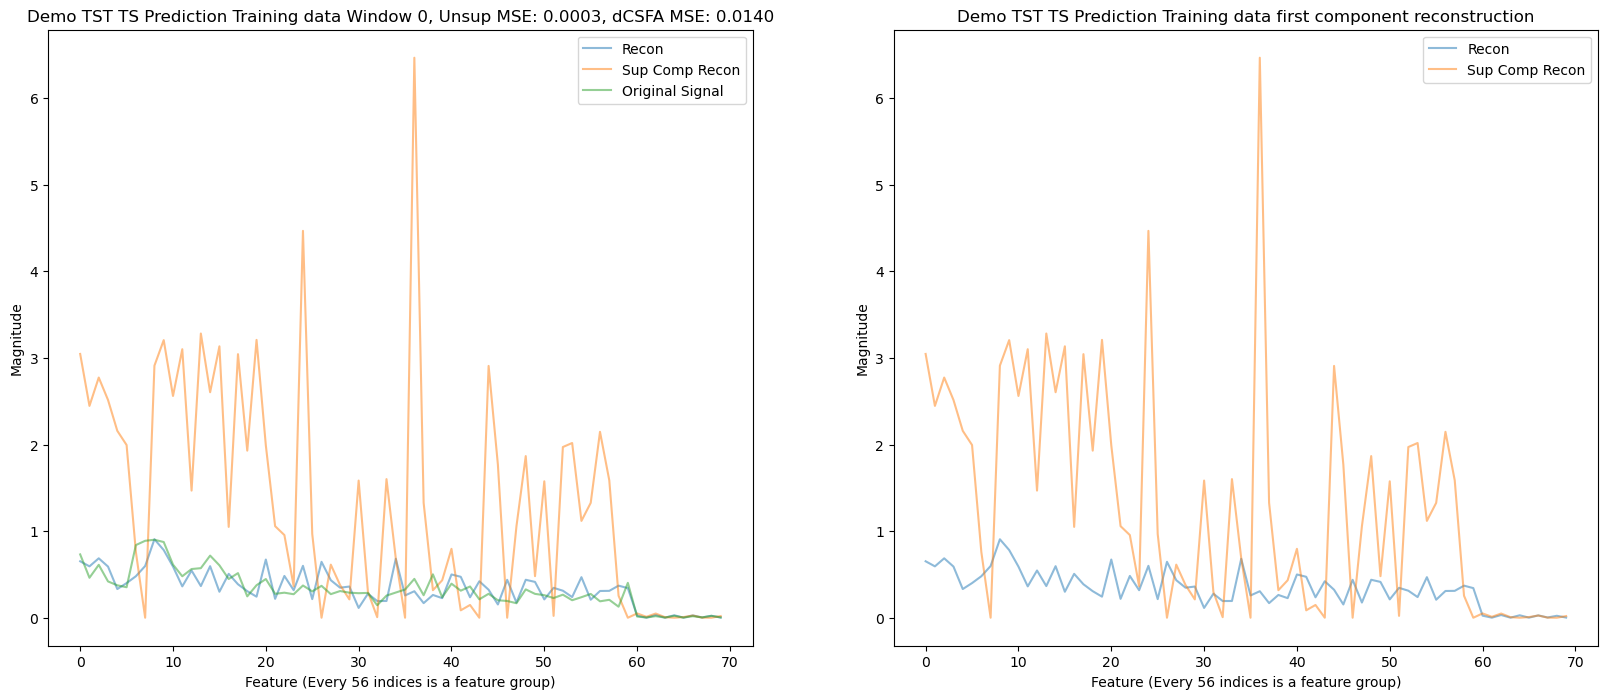

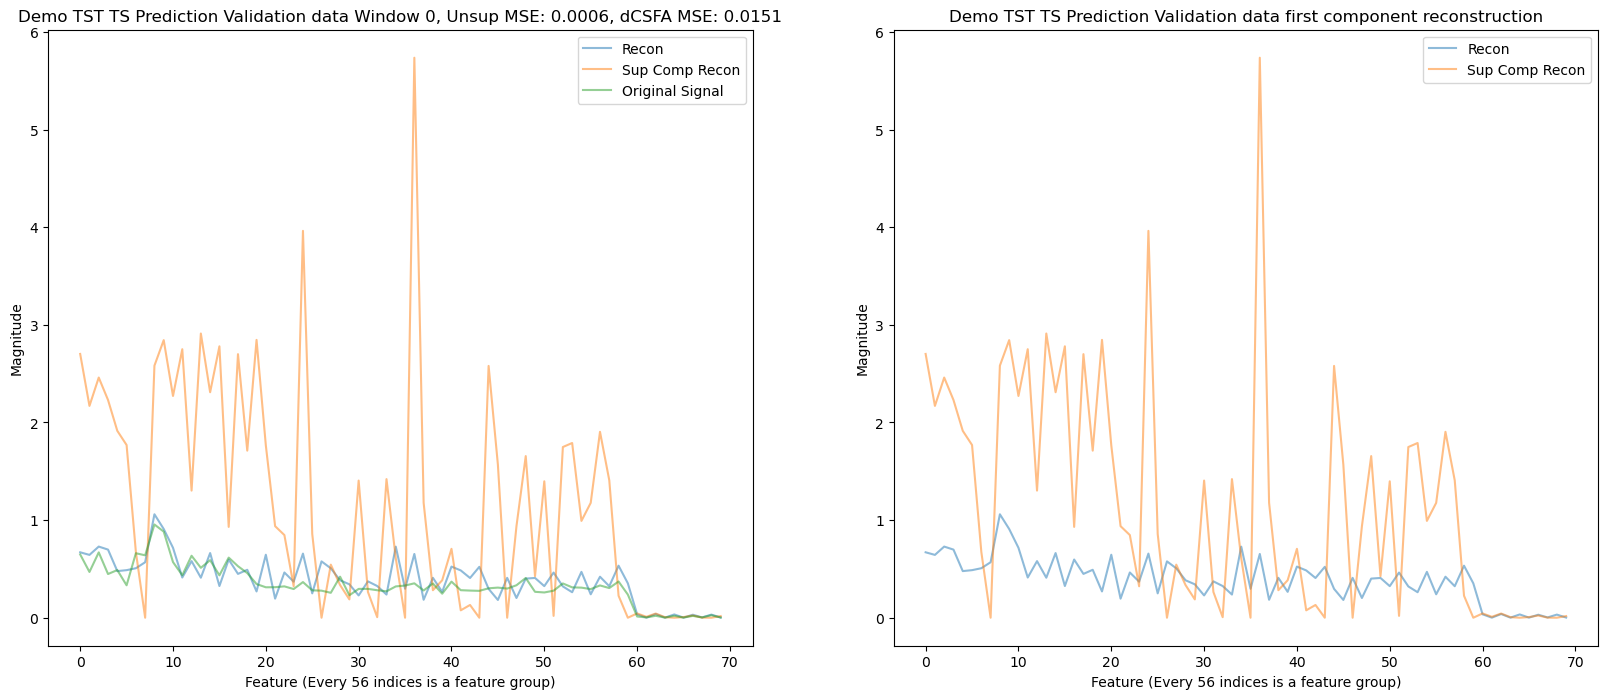

In [43]:
#These plots show the first component reconstructions and complete reconstructions for a single window. The MSE for all windows is shown in the title.
umc_dt.make_recon_plots(model,X_train,0,task="Demo TST TS Prediction Training",saveFile="Demo_train_recon_plot.png")
umc_dt.make_recon_plots(model,X_test,0,task="Demo TST TS Prediction Validation",saveFile="Demo_val_recon_plot.png")

In [44]:
#It is often helpful to compare the MSE to the Variance of the data to infer how much true trend is caputered. If the ratio is greater than 1 that is very bad.
val_mse = model.get_mse_score(X_test)
train_mse = model.get_mse_score(X_train)

var_train = np.std(X_train)**2
var_val = np.std(X_test)**2
print("Training MSE: {:.2}, Training Var: {:.2}, Ratio: {:.2}".format(train_mse,var_train,train_mse/var_train))
print("Validation MSE: {:.2}, Validation Var: {:.2}, Ratio: {:.2}".format(val_mse,var_val,val_mse/var_val))

Training MSE: 0.014, Training Var: 0.041, Ratio: 0.34
Validation MSE: 0.015, Validation Var: 0.042, Ratio: 0.36


In [52]:
areas = ["BLA", "LH", "MD", "mPFC", "vHPC"]

In [55]:
perc_contribution.shape

(20, 70)

(20, 10) (20, 20) (20, 40)


ValueError: x and y must have same first dimension, but have shapes (10,) and (0,)

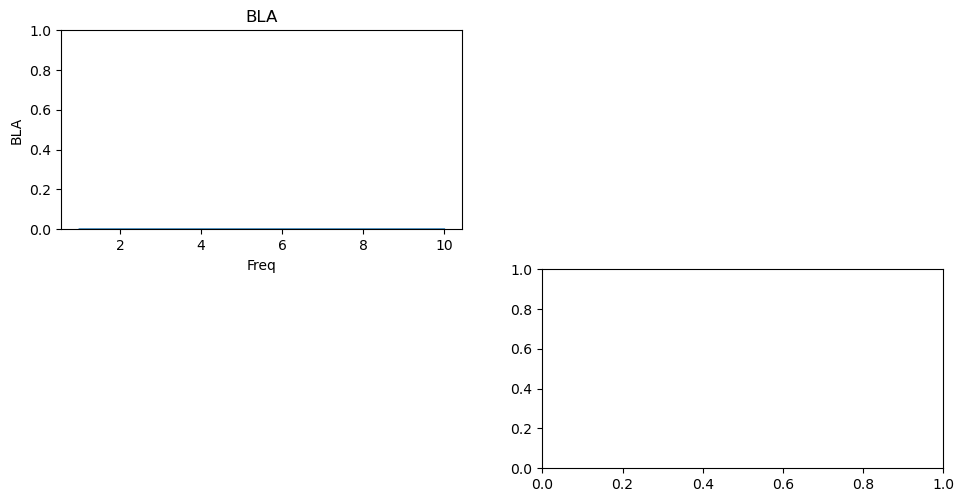

In [60]:
#We also want to evaluate how much our supervised network contributes to the reconstruction of each feature. This allows us to gauge the influence
#our network has on overall brain activity. Green and Red indicate directionality. Green is directionality from the row to the column and red
#is the directionality from the column area to the row area. Red directionality is flipped for visibility and is marked using the far right axis
#of all plots that ranges from -1 to 1. -1 indicates 100% contribution for red and 1 indicats 100% contribution for green. 
#Shapes of the power coherence and granger network contributions are printed out before plotting as a debugging tool.

#Returns a K x M matrix where K is the number of networks learned and M is the number of features. Each entry shows the kth networks percent
#contribution for reconstruction feature m. If you sum this matrix along K, you should end up with a vector of approximately 1's.
perc_contribution = umc_dt.getReconContribution(X_test,N_COMPONENTS,model)

if not DS_FEATURES:
    #Generate the plot
    umc_dt.makeUpperTriangularPlot_pow_coh_gc(perc_contribution, #matrix retrieved above
                                                areas=areas, #all areas recorded
                                                psdFeatures=powFeatures, #powerfeatures
                                                cohFeatures=cohFeatures, #coherence features of format Area1-Area2 <Freq #>
                                                gcFeatures=gcFeatures, #gc features of format Area1->Area2 <Freq #>
                                                freq=10, #number of frequencies per feature
                                                net_idx=0, #which network you would like to generate a plot for. Supervised networks are typically 0
                                                saveFile='UT_demo.png', #saveFile name
                                                title="Demo", #Title for your plot
                                                figsize=(30,15), #size of the plot (width, height)
                                                silenceTicks=True #whether you would like to include the left y-axis labels and x-axis labels on every subplot
                                                )

else:
    umc_dt.makeUpperTriangularPlot_pow_ds(perc_contribution, #matrix retrieved above
                                                areas=areas, #all areas recorded
                                                psdFeatures=powFeatures, #powerfeatures
                                                dsFeatures=train_dict['dsFeatures'], #gc features of format Area1->Area2 <Freq #>
                                                freq=10, #number of frequencies per feature
                                                net_idx=0, #which network you would like to generate a plot for. Supervised networks are typically 0
                                                saveFile='UT_demo.png', #saveFile name
                                                title="Demo", #Title for your plot
                                                figsize=(30,15), #size of the plot (width, height)
                                                silenceTicks=True #whether you would like to include the left y-axis labels and x-axis labels on every subplot
                                                )

## Evaluating Model Predictive Performance

In [48]:
#It is frequently of interest to evaluate the by mouse AUC. This is different than by window as we calculate the AUC for
#each mouse and then take the average and standard error of all mice. We support evaluating the AUC using both the ROC-AUC
#and Mann-Whitney-U methods. These methods should produce identical results in the case of a positively constrained network.
#if the network is negatively correlated, then the deviation from .5 should be the same. For example a negatively correlated
#network with a roc-auc of .9 should have a mw auc of .1.
y_pred_proba, s = model.predict_proba(X_train,include_scores=True)
roc_mean,roc_std = umc_dt.get_mean_std_err_auc(y_pred_proba,y_train.squeeze(),X_train_df['current_subject'])
print("train by-mouse roc auc mean: %0.2f +/- %0.2f"%(roc_mean,roc_std))
mw_mean,mw_std = umc_dt.get_mean_std_err_auc(y_pred_proba,y_train.squeeze(),X_train_df['current_subject'],s,True)
print("train by-mouse mw auc mean: %0.2f +/- %0.2f"%(mw_mean,mw_std))

y_pred_proba, s = model.predict_proba(X_test,include_scores=True)
roc_mean,roc_std = umc_dt.get_mean_std_err_auc(y_pred_proba,y_val.squeeze(),X_test_df['current_subject'])
print("Val by-mouse roc auc mean: %0.2f +/- %0.2f"%(roc_mean,roc_std))
mw_mean,mw_std = umc_dt.get_mean_std_err_auc(y_pred_proba,y_val.squeeze(),X_test_df['current_subject'],s,True)
print("Val by-mouse mw auc mean: %0.2f +/- %0.2f"%(mw_mean,mw_std))

train by-mouse roc auc mean: 0.50 +/- 0.00
train by-mouse mw auc mean: 0.55 +/- 0.14
Val by-mouse roc auc mean: 0.50 +/- 0.00
Val by-mouse mw auc mean: 0.69 +/- 0.12


## Projections

In [47]:
#These are features from the specified projection data file that you would like included in the csv. They must be features
#that have an entry for each window
INCLUDED_FEATURES = ["y_mouse","y_task","y_geno"]

#The file you would like to save to
PROJECTION_SAVE_FILE = "demo_val_projection.csv"

#Get the auc for each mouse. Typically we want the mann-whitney auc so we can infer correlation with the task
y_pred_proba, s = model.predict(X_test,include_scores=True)
mw_auc_dict = umc_dt.lpne_auc(y_pred_proba,y_val.squeeze(),val_dict['y_mouse'],s,True)

#Make the projection. This also returns a pandas dataframe so you can check that the csv has the information you need right here
#in the same python environment.
projection_df = umc_dt.make_projection_csv(VALIDATION_DATA_FILE, #Pickle file you'd like to use for projection
                                            model, #Learned dCSFA-NMF model
                                            X_FEATURE_LIST, #Features used to construct X
                                            INCLUDED_FEATURES, #Features you'd like included in the csv
                                            PROJECTION_SAVE_FILE, #Save file for the csv
                                            auc_dict=mw_auc_dict, #by mouse auc dictionary
                                            auc_type="mw", #What type of auc calculation is being used
                                            weights=X_FEATURE_WEIGHTS) #Weights for each feature for construction X

projection_df.head()

ValueError: operands could not be broadcast together with shapes (214,) (19,) 

## Save your workbook as an HTML file for easy sharing with coworkers

In [ ]:
raise ValueError()

In [ ]:
X_train.shape

In [ ]:
num_power_features

import os

#install ipylab with `pip install ipylab`
from ipylab import JupyterFrontEnd

NOTEBOOK_NAME = "dCSFA_NMF_demo.ipynb" #Change this to the name of your notebook


app = JupyterFrontEnd()
app.commands.execute('docmanager:save')
os.system('jupyter nbconvert --to html {}'.format(NOTEBOOK_NAME))